In [ ]:
# Non-random assignment of subjects
# An agricultural firm is conducting an experiment to measure how feeding sheep different types of grass affects their weight. They have asked for your help to properly set up the experiment. One of their managers has said you can perform the subject assignment by taking the top 250 rows from the DataFrame and that should be fine.

# Your task is to use your analytical skills to demonstrate why this might not be a good idea. Assign the subjects to two groups using non-random assignment (the first 250 rows) and observe the differences in descriptive statistics.

In [172]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from statsmodels.formula.api import ols
from scipy.stats import shapiro, anderson, f_oneway, chi2_contingency, ttest_ind, boxcox, mannwhitneyu, kruskal
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.power import TTestIndPower
from statsmodels.sandbox.stats.multicomp import multipletests
import statsmodels.api as sm

In [2]:
weights = pd.read_csv('chick_weight.csv')
weights

,weight,Time,Chick,Diet
0,42,0,1,1
1,51,2,1,1
2,59,4,1,1
3,64,6,1,1
4,76,8,1,1
...,...,...,...,...
573,175,14,50,4
574,205,16,50,4
575,234,18,50,4
576,264,20,50,4


In [3]:
half_df = int(weights.shape[0]/2)
half_df

289

In [4]:
# Non-random assignment
group1_non_rand = weights.iloc[0:half_df,:]
group2_non_rand = weights.iloc[half_df:,:]

# Compare descriptive statistics of groups
compare_df_non_rand = pd.concat([group1_non_rand['weight'].describe(), group2_non_rand['weight'].describe()], axis=1)
compare_df_non_rand.columns = ['group1', 'group2']

# Print to assess
print(compare_df_non_rand)

           group1      group2
count  289.000000  289.000000
mean   106.491349  137.145329
std     61.354849   76.707912
min     35.000000   39.000000
25%     59.000000   69.000000
50%     89.000000  126.000000
75%    141.000000  186.000000
max    331.000000  373.000000


In [5]:
# Randomly assign half
group1_random = weights.sample(frac=0.5, random_state=42, replace=False)

# Create second assignment
group2_random = weights.drop(group1_random.index)

# Compare assignments
compare_df_random = pd.concat([group1_random['weight'].describe(), group2_random['weight'].describe()], axis=1)
compare_df_random.columns = ['group1', 'group2']
print(compare_df_random)

           group1      group2
count  289.000000  289.000000
mean   120.044983  123.591696
std     70.089685   72.118725
min     35.000000   39.000000
25%     62.000000   63.000000
50%    105.000000  103.000000
75%    163.000000  164.000000
max    373.000000  361.000000


In [ ]:
# Blocking experimental data
# You are working with a manufacturing firm that wants to conduct some experiments on worker productivity. Their dataset only contains 100 rows, so it's important that experimental groups are balanced.

# This sounds like a great opportunity to use your knowledge of blocking to assist them. They have provided a productivity_subjects DataFrame. Split the provided dataset into two even groups of 50 entries each.

In [6]:
productivity_subjects = [i+1 for i in range(100)]
productivity_subjects = pd.DataFrame(productivity_subjects, columns=['subject_id'])
productivity_subjects

,subject_id
0,1
1,2
2,3
3,4
4,5
...,...
95,96
96,97
97,98
98,99


In [7]:
# Randomly assign half
block_1 = productivity_subjects.sample(frac=0.5, random_state=42, replace=False)

# Set the block column
block_1['block'] = 1

block_1.head()

,subject_id,block
83,84,1
53,54,1
70,71,1
45,46,1
44,45,1


In [8]:
# Create second assignment and label
block_2 = productivity_subjects.drop(block_1.index)
block_2['block'] = 2

block_2.head()

,subject_id,block
1,2,2
2,3,2
3,4,2
6,7,2
8,9,2


In [9]:
# Concatenate and print
productivity_combined = pd.concat([block_1, block_2], axis=0)
productivity_combined

,subject_id,block
83,84,1
53,54,1
70,71,1
45,46,1
44,45,1
...,...,...
92,93,2
94,95,2
97,98,2
98,99,2


In [10]:
print(productivity_combined['block'].value_counts())

block
1    50
2    50
Name: count, dtype: int64


In [ ]:
# Stratifying an experiment
# You are working with a government organization that wants to undertake an experiment around how some particular government policies impact the net wealth of individuals in a number of areas.

# They have approached you to help set up the experimental design. They have warned you that there is likely to be a small group of users who already have high net wealth and are concerned that this group might overshadow any experimental outcome observed. You know just what to do!

# Use your knowledge of experimental design to undertake block randomization, stratifying by the high_wealth column in the provided wealth_data DataFrame. There are 2000 rows in the DataFrame with 200 high net wealth subjects (high_wealth is 1).

In [20]:

# Set a random seed for reproducibility
np.random.seed(0)

# number of '1' and '0'
n_0 = 1800
n_1 = 200


In [33]:
# Generate low wealth random data
net_wealth = np.random.uniform(100000, 320000, n_0)
service_involvement = np.random.randint(10, 70, n_0)

# Generate 'low_wealth' data wit 1800 '0's
low_wealth = np.array([0]*n_0)
np.random.shuffle(low_wealth)

# Create DataFrame
low_wealth_data = pd.DataFrame({
    'net_wealth': net_wealth,
    'service_involvement': service_involvement,
    'high_wealth': low_wealth # to keep the same column name, for the following concatenation
})

print(low_wealth_data)

         net_wealth  service_involvement  high_wealth
0     121397.832796                   58            0
1     253168.459342                   12            0
2     194504.685935                   29            0
3     222999.836607                   22            0
4     130393.539828                   58            0
...             ...                  ...          ...
1795  137564.467359                   65            0
1796  101672.044223                   47            0
1797  283128.111195                   11            0
1798  223114.728924                   30            0
1799  189181.583840                   13            0

[1800 rows x 3 columns]


In [36]:
# Generate high wealth random data
net_wealth = np.random.uniform(250000, 700000, n_1)
service_involvement = np.random.randint(10, 70, n_1)

# Generate 'high_wealth' data with 200 '1's 
high_wealth = np.array([1]*n_1)
np.random.shuffle(high_wealth)

# Create DataFrame
high_wealth_data = pd.DataFrame({
    'net_wealth': net_wealth,
    'service_involvement': service_involvement,
    'high_wealth': high_wealth
})

print(high_wealth_data)

        net_wealth  service_involvement  high_wealth
0    275684.784157                   11            1
1    318501.826708                   67            1
2    510215.380417                   66            1
3    623185.227892                   22            1
4    550176.367675                   54            1
..             ...                  ...          ...
195  496890.646538                   56            1
196  338127.020309                   27            1
197  612837.476709                   13            1
198  388301.261038                   36            1
199  378391.728038                   24            1

[200 rows x 3 columns]


In [37]:
wealth_data = pd.concat([low_wealth_data, high_wealth_data])

# Shuffle the rows
wealth_data = wealth_data.sample(frac=1).reset_index(drop=True)

wealth_data

,net_wealth,service_involvement,high_wealth
0,221335.808377,68,0
1,309495.205644,12,0
2,198634.061115,52,0
3,195049.909469,36,0
4,239191.768708,25,0
...,...,...,...
1995,435724.367124,12,1
1996,159780.058490,53,0
1997,312060.292810,19,0
1998,177207.543904,60,0


In [38]:
# Create the first block
strata_1 = wealth_data[wealth_data['high_wealth'] == 1]
strata_1['Block'] = 1

strata_1

C:\Users\Alienware\AppData\Local\Temp\ipykernel_4500\866739461.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strata_1['Block'] = 1


,net_wealth,service_involvement,high_wealth,Block
12,540245.047726,60,1,1
22,295212.243009,31,1,1
33,314843.994172,64,1,1
37,263605.235506,23,1,1
53,359546.422731,64,1,1
...,...,...,...,...
1964,555404.219946,27,1,1
1965,672913.447472,10,1,1
1979,309297.913252,57,1,1
1985,664242.639441,37,1,1


In [39]:
# Create two groups assigning to Treatment or Control
strata_1_g1 = strata_1.sample(frac=0.5, replace=False)
strata_1_g1['T_C'] = 'T'
strata_1_g1

,net_wealth,service_involvement,high_wealth,Block,T_C
1653,548787.053329,38,1,1,T
475,616190.192435,62,1,1,T
1067,394129.550782,21,1,1,T
1173,393481.722029,58,1,1,T
1155,443379.991050,60,1,1,T
...,...,...,...,...,...
1372,583906.326090,60,1,1,T
983,553136.668852,69,1,1,T
1187,690951.420431,28,1,1,T
1204,497164.977800,23,1,1,T


In [40]:
strata_1_g2 = strata_1.drop(strata_1_g1.index)
strata_1_g2['T_C'] = 'C'
strata_1_g2

,net_wealth,service_involvement,high_wealth,Block,T_C
33,314843.994172,64,1,1,C
37,263605.235506,23,1,1,C
65,342362.016792,54,1,1,C
91,415501.338257,29,1,1,C
99,502424.927630,34,1,1,C
...,...,...,...,...,...
1962,648423.742525,57,1,1,C
1963,388301.261038,36,1,1,C
1964,555404.219946,27,1,1,C
1965,672913.447472,10,1,1,C


In [41]:
# Create the first block
strata_1 = wealth_data[wealth_data['high_wealth'] == 1]
strata_1['Block'] = 1

# Create two groups assigning to Treatment or Control
strata_1_g1 = strata_1.sample(int(n_1/2), replace=False)
strata_1_g1['T_C'] = 'T'
strata_1_g2 = strata_1.drop(strata_1_g1.index)
strata_1_g2['T_C'] = 'C'

# Create the second block and assign groups
strata_2 = wealth_data[wealth_data['high_wealth'] == 0]
strata_2['Block'] = 2

strata_2_g1 = strata_2.sample(int(n_0/2), replace=False)
strata_2_g1['T_C'] = 'T'
strata_2_g2 = strata_2.drop(strata_2_g1.index)
strata_2_g2['T_C'] = 'C'

# Concatenate the grouping work
wealth_data_stratified = pd.concat([strata_1_g1, strata_1_g2, strata_2_g1, strata_2_g2])
wealth_data_stratified

C:\Users\Alienware\AppData\Local\Temp\ipykernel_4500\1666222215.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strata_1['Block'] = 1
C:\Users\Alienware\AppData\Local\Temp\ipykernel_4500\1666222215.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strata_2['Block'] = 2


,net_wealth,service_involvement,high_wealth,Block,T_C
1891,432773.081587,62,1,1,T
1498,402025.459707,67,1,1,T
1152,560708.246182,52,1,1,T
1167,623185.227892,22,1,1,T
926,423076.129033,36,1,1,T
...,...,...,...,...,...
1991,198457.963393,60,0,2,C
1992,302668.615785,15,0,2,C
1994,247448.407300,11,0,2,C
1996,159780.058490,53,0,2,C


In [42]:
print(wealth_data_stratified.groupby(['Block','T_C', 'high_wealth']).size())

Block  T_C  high_wealth
1      C    1              100
       T    1              100
2      C    0              900
       T    0              900
dtype: int64


In [43]:
wealth_data_stratified.groupby('high_wealth')['net_wealth'].mean()

high_wealth
0    208270.311812
1    464682.756467
Name: net_wealth, dtype: float64

In [ ]:
# Visual normality in an agricultural experiment
# You have been contracted by an agricultural firm conducting an experiment on 50 chickens, divided into four groups, each fed a different diet. Weight measurements were taken every second day for 20 days.

# You'll analyze chicken_data to assess normality, which will determine the suitability of parametric statistical tests, beginning with a visual examination of the data distribution. 

In [44]:
chicken_data = pd.read_csv('chick_weight.csv')
chicken_data

,weight,Time,Chick,Diet
0,42,0,1,1
1,51,2,1,1
2,59,4,1,1
3,64,6,1,1
4,76,8,1,1
...,...,...,...,...
573,175,14,50,4
574,205,16,50,4
575,234,18,50,4
576,264,20,50,4


C:\Users\Alienware\miniconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


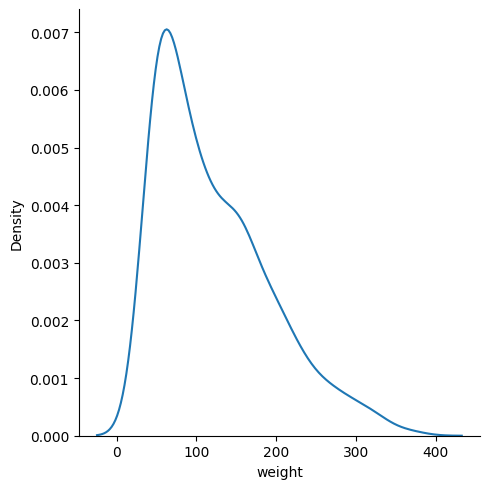

In [45]:
# Plot the distribution of the chickens' weight
sns.displot(data=chicken_data, x='weight', kind='kde')
plt.show()

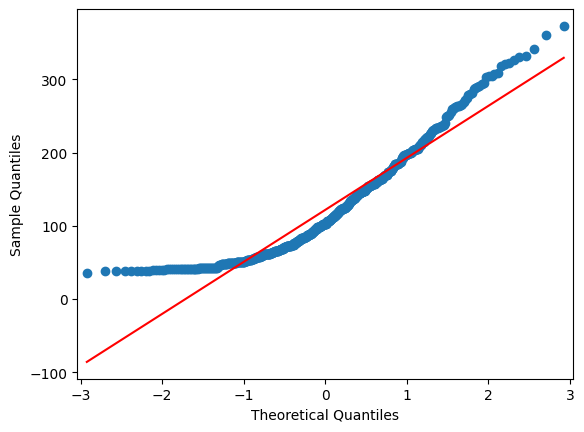

In [46]:
# Plot the qq plot of the chickens' weight
qqplot(data=chicken_data.weight, line='s')
plt.show()

C:\Users\Alienware\miniconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


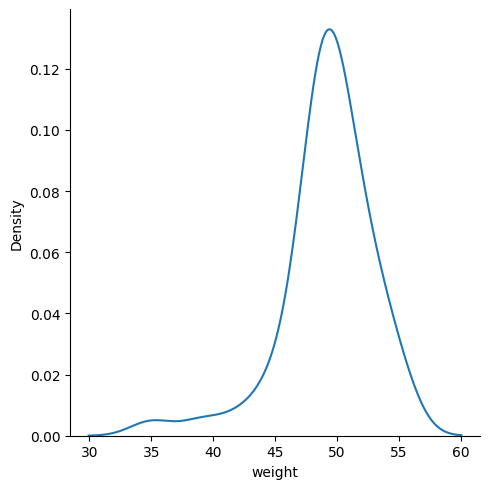

In [47]:
# Subset the data
subset_data = chicken_data[chicken_data['Time'] == 2]

# Repeat the plotting
sns.displot(data=subset_data, x='weight', kind="kde")
plt.show()

In [ ]:
# Analytical normality in an agricultural experiment

# Carrying on from your previous work, your visual inspections of the data indicate it may not be a normal dataset overall, but that the initial time point may be.

# Build on your previous work by using analytical methods to determine the normality of the dataset.


In [48]:
# Run a Shapiro-Wilk normality test on the weight column
test_statistic, p_value = shapiro(chicken_data['weight'])

# If a Shapiro-Wilk test yields a p-value below alpha, normality is not assumed.
# Alpha is also called the significance level.

print(f"p: {round(p_value, 4)} test stat: {round(test_statistic, 4)}")

p: 0.0 test stat: 0.9087


In [49]:
# Run the Anderson-Darling test
result = anderson(x=chicken_data['weight'], dist='norm')

# The Anderson-Darling test provides a range of critical values for different significance levels which need to be matched up 1-1 for analysis.
# If the test statistic is more than the critical value at a given significance, we reject the null hypothesis (of normality) at that significance level (so we assume not normality), and vice versa.

print(f"Test statistic: {round(result.statistic, 4)}")
print(f"Significance Levels: {result.significance_level}")
print(f"Critical Values: {result.critical_values}")

Test statistic: 14.6868
Significance Levels: [15.  10.   5.   2.5  1. ]
Critical Values: [0.572 0.652 0.782 0.912 1.085]


In [ ]:
# Understanding marketing campaign effectiveness

# Imagine you're a digital marketer analyzing data from a recent campaign to understand what messaging style and time of day yield the highest conversions. This analysis is crucial for guiding future marketing strategies, ensuring that your messages reach potential customers when they're most likely to engage. In this exercise, you're working with a dataset giving the outcomes of different messaging styles ('Casual' versus 'Formal') and times of day ('Morning' versus 'Evening') on conversion rates, a common scenario in marketing data analysis.

In [50]:
marketing_data = pd.read_feather('marketing_data.feather')

marketing_data

,Messaging_Style,Time_of_Day,Click_Through_Rate,Conversions
0,Casual,Morning,0.640465,500
1,Formal,Evening,0.698533,598
2,Casual,Morning,0.257834,234
3,Casual,Evening,0.922971,602
4,Casual,Morning,0.476893,314
...,...,...,...,...
945,Casual,Morning,0.759764,579
946,Casual,Evening,0.654387,65
947,Formal,Morning,0.269222,292
948,Formal,Evening,0.419846,25


In [51]:
# Create a pivot table for marketing campaign data
marketing_pivot = marketing_data.pivot_table(
  values='Conversions', 
  index='Messaging_Style', 
  columns='Time_of_Day', 
  aggfunc='mean')

# View the pivoted results
print(marketing_pivot)

Time_of_Day         Evening     Morning
Messaging_Style                        
Casual           402.329004  401.133891
Formal           432.913043  411.096000


In [ ]:
# Heatmap of campaign interactions

# Visualizing data can often reveal patterns that are not immediately obvious. In the context of marketing, understanding how different factors interact and affect the success of a campaign is vital. By creating a heatmap of conversions based on messaging style and time of day, you can quickly identify which combinations perform best and which ones need reevaluation. This visual tool is invaluable for marketing teams looking to optimize their strategies for maximum impact.

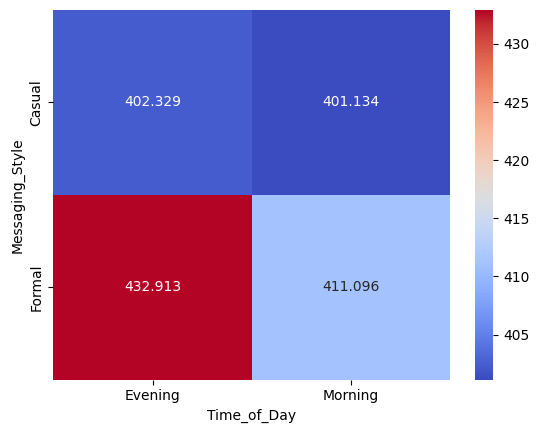

In [52]:
# Visualize interactions with a heatmap
sns.heatmap(marketing_pivot, 
         annot=True, 
         cmap='coolwarm',
         fmt='g')

plt.show()

Implementing a randomized block design

The manufacturing firm you worked with earlier is still interested in conducting some experiments on worker productivity. theblocks can be set randomly. While this can work, it can be better to group subjects based on similar characteristics.

The same employees are again loaded but this time in a DataFrame called productivity including 1200 other colleagues. It also includes a worker 'productivity_score' column based on units produced per hour. This column was binned into three groups to generate blocks based on similar productivity values. The firm would like to apply a new incentive program with three options ('Bonus', 'Profit Sharing' and 'Work from Home') throughout the firm with treatment applied randomly.

In [131]:
subject_id = [i+1 for i in range(1300)]

productivity = pd.DataFrame({'subject_id' : subject_id})

productivity

,subject_id
0,1
1,2
2,3
3,4
4,5
...,...
1295,1296
1296,1297
1297,1298
1298,1299


In [132]:
# Assign treatment randomly
productivity['Treatment'] = np.random.choice(
  ['Bonus', 'Profit Sharing', 'Work from Home'],
  size=len(productivity)
)

productivity

,subject_id,Treatment
0,1,Profit Sharing
1,2,Work from Home
2,3,Work from Home
3,4,Bonus
4,5,Work from Home
...,...,...
1295,1296,Profit Sharing
1296,1297,Work from Home
1297,1298,Profit Sharing
1298,1299,Work from Home


In [133]:
# Generate scores
productivity_score1 = np.round(np.random.uniform(1.1, 29.9, size=len(productivity[productivity['Treatment'] == 'Bonus'])), 1)
productivity_score2 = np.round(np.random.uniform(2.1, 28.9, size=len(productivity[productivity['Treatment'] == 'Profit Sharing'])), 1)
productivity_score3 = np.round(np.random.uniform(3.1, 32.9, size=len(productivity[productivity['Treatment'] == 'Work from Home'])), 1)

# Assign scores
productivity.loc[productivity['Treatment'] == 'Bonus', 'productivity_score'] = productivity_score1
productivity.loc[productivity['Treatment'] == 'Profit Sharing', 'productivity_score'] = productivity_score2
productivity.loc[productivity['Treatment'] == 'Work from Home', 'productivity_score'] = productivity_score3

productivity

,subject_id,Treatment,productivity_score
0,1,Profit Sharing,17.7
1,2,Work from Home,28.4
2,3,Work from Home,12.9
3,4,Bonus,1.3
4,5,Work from Home,25.1
...,...,...,...
1295,1296,Profit Sharing,26.1
1296,1297,Work from Home,14.5
1297,1298,Profit Sharing,4.8
1298,1299,Work from Home,20.3


In [75]:
# def assign_block(treat): # one block per treatment
#     if treat == 'Bonus':
#         return 1
#     elif treat == 'Profit Sharing':
#         return 2
#     else:
#         return 3

# productivity['block'] = productivity['Treatment'].apply(assign_block) # .astype(int)
# productivity

In [134]:
blocks = [random.randint(1,3) for _ in range(productivity.shape[0])]
productivity['blocks'] = blocks
productivity

,subject_id,Treatment,productivity_score,blocks
0,1,Profit Sharing,17.7,3
1,2,Work from Home,28.4,3
2,3,Work from Home,12.9,2
3,4,Bonus,1.3,3
4,5,Work from Home,25.1,2
...,...,...,...,...
1295,1296,Profit Sharing,26.1,2
1296,1297,Work from Home,14.5,1
1297,1298,Profit Sharing,4.8,3
1298,1299,Work from Home,20.3,3


In [ ]:
# Visualizing productivity within blocks by incentive

# Continuing with the worker productivity example, you'll explore if the productivity scores are distributed throughout the data as one would expect with random assignment of treatment. Note that this is a precautionary step, and the treatment and follow-up results on the impact of the three treatments is not done yet!

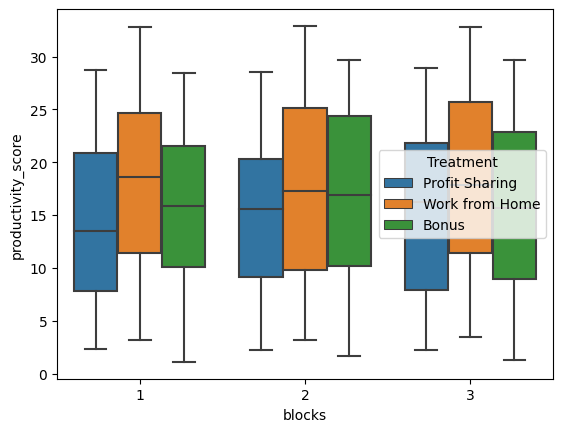

In [135]:
# Make a plot showing how productivity_score varies within blocks
sns.boxplot(x='blocks', 
            y='productivity_score', 
            hue='Treatment', 
            data=productivity)

plt.show()

In [ ]:
# ANOVA within blocks of employees

# Before assessing the full impact of these incentive treatments on productivity, it's crucial to verify that the initial treatment assignment was indeed random and equitable across the different productivity blocks. This step ensures that any observed differences in productivity post-treatment can be confidently attributed to the incentive programs themselves, rather than pre-existing disparities in the blocks.

In [136]:
# Perform the within blocks ANOVA, first grouping by block 
# (apply anova three times, one per block, to check if there are significative differences among the means of the productivitu score for the three treatments applied)
within_block_anova = productivity.groupby('blocks').apply( # The apply function acts like a for loop, executing ANOVA for each block.
  # Set function
  lambda x: f_oneway(
    # Filter Treatment values based on outcome
    x[x['Treatment'] == 'Bonus']['productivity_score'], 
    x[x['Treatment'] == 'Profit Sharing']['productivity_score'],
    x[x['Treatment'] == 'Work from Home']['productivity_score'])
)

# The calculated p values suggest that there is evidence of a difference in productivity scores between the treatments in block 1, but it is not strong enough to be statistically significant in block 2 and 3

print(within_block_anova)

blocks
1    (9.13291294636024, 0.00013010086956845104)
2     (4.306963126098083, 0.014046999426591914)
3     (4.069031327678547, 0.017782240849981798)
dtype: object


C:\Users\Alienware\AppData\Local\Temp\ipykernel_4500\1227468545.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  within_block_anova = productivity.groupby('blocks').apply(


In [ ]:
# Covariate adjustment with chick growth

# Imagine studying in agricultural science the growth patterns of chicks under various dietary regimens. The data from this study sheds light on the intricate relationship between their respective diets and the consequent impact on their weight. This data includes weight measurements of chicks at different ages, allowing for an exploration of covariate adjustment. age serves as a covariate, potentially influencing the outcome variable: the weight of the chicks.

In [137]:
chick_data = pd.read_csv('chick_weight.csv')
chick_data

,weight,Time,Chick,Diet
0,42,0,1,1
1,51,2,1,1
2,59,4,1,1
3,64,6,1,1
4,76,8,1,1
...,...,...,...,...
573,175,14,50,4
574,205,16,50,4
575,234,18,50,4
576,264,20,50,4


In [138]:
# Analysis of Covariance (ANCOVA) using Ordinary Least Squares (OLS) regression. The dependent variable is weight, and the predictors are Diet and Time.

# Perform ANCOVA with Diet and Time as predictors (without interactions)
model = ols('weight ~ Diet + Time', data=chick_data).fit()

# Print a summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     809.2
Date:                Mon, 28 Oct 2024   Prob (F-statistic):          6.77e-168
Time:                        14:31:19   Log-Likelihood:                -2897.1
No. Observations:                 578   AIC:                             5800.
Df Residuals:                     575   BIC:                             5813.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5428      4.043      0.382      0.7

In [ ]:
# R-squared: The R-squared value is 0.738, indicating that approximately 73.8% of the variation in the weight can be explained by the Diet and Time variables.
# F-statistic: The F-statistic is 809.2 with a very small p-value (6.77e-168), indicating that at least one of the predictors (Diet or Time) is statistically significant.
# Coefficients:
# Intercept: The intercept is 1.5428, but its p-value is 0.703, indicating it’s not statistically significant.
# Diet: The coefficient for Diet is 11.7786, and its p-value is less than 0.05, indicating that Diet is a significant predictor of weight.
# Time: The coefficient for Time is 8.7653, and its p-value is less than 0.05, indicating that Time is also a significant predictor of weight.
# Omnibus/Prob(Omnibus): This is a test of the skewness and kurtosis of the residual (the difference between the observed and predicted values). The Omnibus is 75.227 with a p-value of 0.000, suggesting the residuals are not normally distributed.
# Durbin-Watson: This tests for homoscedasticity (equal variances). The value is 0.415, which is less than 1, suggesting that there may be some evidence of heteroscedasticity (unequal variances).
# Jarque-Bera (JB)/Prob(JB): This is another test of the skewness and kurtosis of the residuals. The JB statistic is 235.091 with a p-value of 8.92e-52, also suggesting the residuals are not normally distributed.
# Condition Number (Cond. No.): This is a test for multicollinearity (when predictors are highly correlated with each other). The value is 35.2, which is not too high, suggesting that multicollinearity is likely not a problem in this model.

In [139]:
# Perform ANCOVA with Diet and Time as predictors (with interactions)
model = ols('weight ~ Diet * Time', data=chick_data).fit()

# Print a summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     594.9
Date:                Mon, 28 Oct 2024   Prob (F-statistic):          1.17e-175
Time:                        14:34:17   Log-Likelihood:                -2875.6
No. Observations:                 578   AIC:                             5759.
Df Residuals:                     574   BIC:                             5777.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.9838      5.895      5.256      0.0

In [ ]:
# Considering Interactions:

# the interaction term Diet:Time is statistically significant (p-value < 0.05), which suggests that the effect of Time on weight depends on Diet. Specifically, for each unit increase in Time, the predicted weight increases by 1.2449 units more for one diet compared to the other. The Time variable is also significant, indicating that Time has an effect on weight beyond its interaction with Diet. The Diet variable is not significant (p-value > 0.05), suggesting that the effect of Diet on weight does not exist beyond its interaction with Time. The model explains about 75.7% of the variance in weight (R-squared = 0.757).

In the first model, Diet was significant, indicating that there was a significant difference in weight between the diets when not considering Time.

weight ~ Diet + Time: This is an additive model that assumes the effects of Diet and Time on weight are independent of each other. In terms of the plot below, this would mean that the lines for each diet are parallel. The effect of Time on weight (i.e., the slope of the line) is the same for all diets, and the effect of Diet on weight (i.e., the difference in the y-intercepts of the lines) is the same at all levels of Time.

 However, in the second model that includes the interaction term, Diet was not significant. This suggests that once you take into account the interaction with Time, there is no longer a significant main effect of Diet on weight. Instead, the effect of Diet on weight depends on the level of Time.

weight ~ Diet * Time: This is an interaction model that allows the effect of Time on weight to depend on Diet, and vice versa. In terms of the plot, this would mean that the lines for each diet are not necessarily parallel. The slope of the line can vary depending on the diet, indicating that the rate of weight gain over time can be different for different diets.


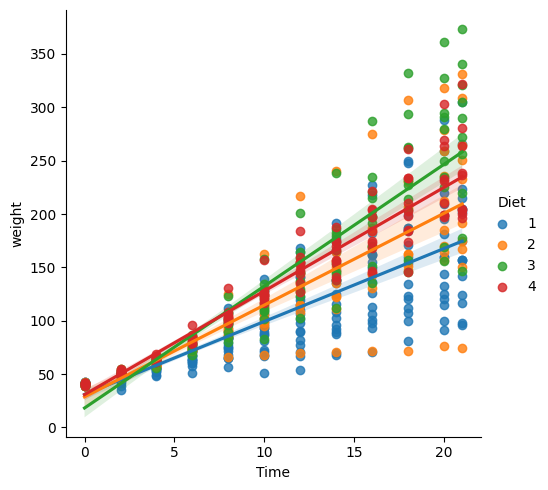

In [140]:
# Visualize the high correlation of Time over Weights (and a certain interaction with Diet)
sns.lmplot(x='Time', y='weight', 
         hue='Diet', 
         data=chick_data)
plt.show()

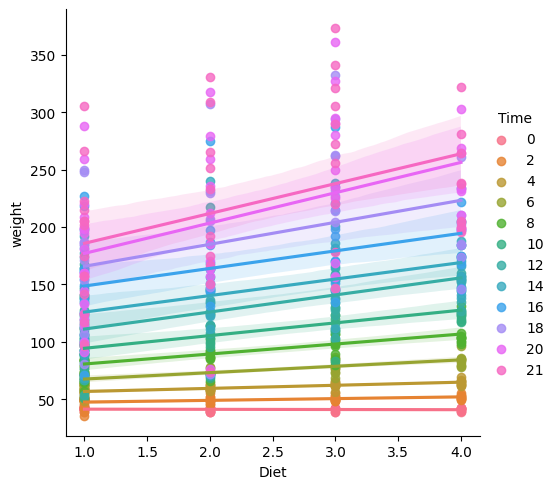

In [141]:
# Visualize the low correlation of Diet over Weight (and a certain interaction with Time)
sns.lmplot(x='Diet', y='weight', 
         hue='Time', 
         data=chick_data)
plt.show()

In [ ]:
# Choosing the right test: petrochemicals

# In a chemistry research lab, scientists are examining the efficiency of three well-known catalysts—Palladium (Pd), Platinum (Pt), and Nickel (Ni)—in facilitating a particular reaction. Each catalyst is used in a set of identical reactions under controlled conditions, and the time taken for each reaction to reach completion is meticulously recorded. Your goal is to compare the mean reaction times across the three catalyst groups to identify which catalyst, if any, has a significantly different reaction time.

In [142]:
chemical_reactions = pd.read_csv('chemical_reactions.csv')
chemical_reactions

,Catalyst,Reaction_Time
0,Palladium,47.483571
1,Palladium,44.308678
2,Palladium,48.238443
3,Palladium,52.615149
4,Palladium,43.829233
...,...,...
1120,Nickel,55.527630
1121,Nickel,55.935152
1122,Nickel,53.193651
1123,Nickel,44.284975


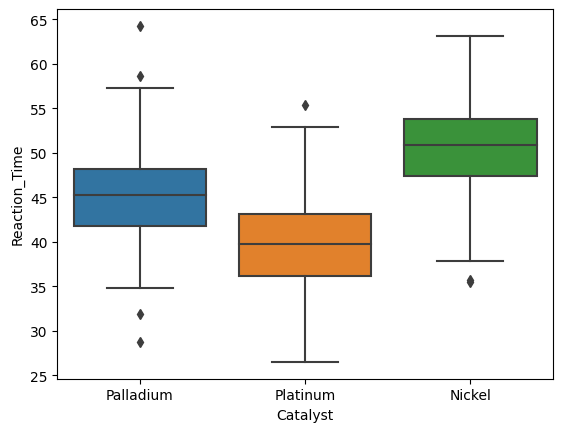

In [145]:
# Make a plot showing how reaction time varies within catalysts
sns.boxplot(x='Catalyst', 
            y='Reaction_Time', 
            # hue='Treatment', 
            data=chemical_reactions)

plt.show()

In [143]:
catalyst_types = ['Palladium', 'Platinum', 'Nickel']

# Collect reaction times for each catalyst into a list
groups = [chemical_reactions[chemical_reactions['Catalyst'] == catalyst]['Reaction_Time'] for catalyst in catalyst_types]

print(len(groups))
groups

3


[0      47.483571
 1      44.308678
 2      48.238443
 3      52.615149
 4      43.829233
          ...    
 370    45.122551
 371    47.489991
 372    52.255718
 373    49.796354
 374    55.765912
 Name: Reaction_Time, Length: 375, dtype: float64,
 375    36.163262
 376    44.361603
 377    40.916710
 378    50.949015
 379    35.958509
          ...    
 745    36.371281
 746    40.933834
 747    36.223085
 748    36.942411
 749    32.966695
 Name: Reaction_Time, Length: 375, dtype: float64,
 750     45.383834
 751     43.241577
 752     45.120634
 753     55.268209
 754     45.253006
           ...    
 1120    55.527630
 1121    55.935152
 1122    53.193651
 1123    44.284975
 1124    58.167158
 Name: Reaction_Time, Length: 375, dtype: float64]

In [144]:
# Perform the one-way ANOVA across the three groups
f_stat, p_val = f_oneway(*groups)
print(p_val)

4.710677600047866e-151


In [ ]:
# Choosing the right test: human resources

# In human resources, it's essential to understand the relationships between different variables that might influence employee satisfaction or turnover. Consider a scenario where an HR department is interested in understanding the association between the department in which employees work and their participation in a new workplace wellness program. The HR team has compiled this data over the past two years and has asked you if there's any significant association between an employee's department and their enrolling in the wellness program.

In [146]:
hr_wellness = pd.read_csv('hr_wellness.csv')
hr_wellness

,Department,Wellness_Program_Status
0,Marketing,Enrolled
1,Sales,Enrolled
2,Marketing,Not Enrolled
3,Marketing,Not Enrolled
4,Sales,Enrolled
...,...,...
1415,Sales,Enrolled
1416,Engineering,Enrolled
1417,Engineering,Enrolled
1418,Marketing,Enrolled


In [147]:
# Create a contingency table
contingency_table = pd.crosstab(
  hr_wellness['Department'], 
  hr_wellness['Wellness_Program_Status']
)

contingency_table

Wellness_Program_Status,Enrolled,Not Enrolled
Department,,
Engineering,279,187
Marketing,276,186
Sales,269,223


In [148]:
# Perform the chi-square test of association
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
print(p_val)

0.17573344450112738


In [ ]:
# Choosing the right test: finance

# In the realm of finance, investment strategists are continually evaluating different approaches to maximize returns. Consider a scenario where a financial firm wishes to assess the effectiveness of two investment strategies: "Quantitative Analysis" and "Fundamental Analysis". The firm has applied each strategy to a separate set of investment portfolios for a year and now asks you to compare the annual returns to determine if there is any difference in strategy returns by comparing the mean returns of the two groups.

In [149]:
investment_returns = pd.read_csv('investment_returns.csv')
investment_returns

,Strategy_Type,Annual_Return
0,Quantitative,10.597379
1,Quantitative,1.656248
2,Quantitative,9.202100
3,Quantitative,3.980213
4,Quantitative,8.086720
...,...,...
835,Fundamental,2.201122
836,Fundamental,8.275464
837,Fundamental,2.923039
838,Fundamental,-1.420455


In [150]:
# Separate the annual returns by strategy type
quantitative_returns = investment_returns[investment_returns['Strategy_Type'] == 'Quantitative']['Annual_Return']
fundamental_returns = investment_returns[investment_returns['Strategy_Type'] == 'Fundamental']['Annual_Return']

quantitative_returns

0      10.597379
1       1.656248
2       9.202100
3       3.980213
4       8.086720
         ...    
415     7.377086
416     9.334679
417    11.469286
418    10.565532
419     8.242059
Name: Annual_Return, Length: 420, dtype: float64

In [153]:
# Perform the independent samples t-test between the two groups
t_stat, p_val = ttest_ind(quantitative_returns, fundamental_returns, equal_var=False)
print(p_val)

2.0687757667258844e-14


In [ ]:
# Anxiety treatments ANOVA

# Psychologists conducted a study to compare the effectiveness of three types of therapy on reducing anxiety levels: Cognitive Behavioral Therapy (CBT), Dialectical Behavior Therapy (DBT), and Acceptance and Commitment Therapy (ACT). Participants were randomly assigned to one of the three therapy groups, and their anxiety levels were measured before and after the therapy sessions. The psychologists have asked you to determine if there are any significant differences in the effectiveness of these therapies.

In [154]:
# Define the therapy types and their counts
therapy_types = ['CBT', 'ACT', 'DBT']
therapy_counts = [492, 468, 462]

# Generate a list of therapy types
therapy_list = np.repeat(therapy_types, therapy_counts)

print(therapy_list.shape)
print(therapy_list)

# Generate a list of anxiety reduction scores
# Here I'm generating random numbers, but you would use your actual data
np.random.seed(0)  # for reproducibility
anxiety_reduction = np.random.uniform(-2, 33, len(therapy_list))

# Create the DataFrame
therapy_outcomes = pd.DataFrame({
    'Therapy_Type': therapy_list,
    'Anxiety_Reduction': anxiety_reduction
})

# Display the DataFrame
therapy_outcomes

(1422,)
['CBT' 'CBT' 'CBT' ... 'DBT' 'DBT' 'DBT']


,Therapy_Type,Anxiety_Reduction
0,CBT,17.208473
1,CBT,23.031628
2,CBT,19.096718
3,CBT,17.070911
4,CBT,12.827918
...,...,...
1417,DBT,2.630699
1418,DBT,4.763270
1419,DBT,21.991350
1420,DBT,-0.267509


In [155]:
Therapy_Type = ['ALF' for _ in range(480)]
Anxiety_Reduction = np.random.uniform(-5, 30, len(Therapy_Type))

therapy_outcomes_ALF = pd.DataFrame({'Therapy_Type':Therapy_Type, 'Anxiety_Reduction': Anxiety_Reduction})
therapy_outcomes_ALF

,Therapy_Type,Anxiety_Reduction
0,ALF,-0.303923
1,ALF,6.078939
2,ALF,5.456261
3,ALF,3.927232
4,ALF,21.268783
...,...,...
475,ALF,23.068503
476,ALF,-4.078753
477,ALF,20.160762
478,ALF,23.898829


In [156]:
therapy_outcomes = pd.concat([therapy_outcomes, therapy_outcomes_ALF])
therapy_outcomes = therapy_outcomes.reset_index(drop=True)
therapy_outcomes

,Therapy_Type,Anxiety_Reduction
0,CBT,17.208473
1,CBT,23.031628
2,CBT,19.096718
3,CBT,17.070911
4,CBT,12.827918
...,...,...
1897,ALF,23.068503
1898,ALF,-4.078753
1899,ALF,20.160762
1900,ALF,23.898829


In [157]:
# Pivot to view the mean anxiety reduction for each therapy
pivot_table = therapy_outcomes.pivot_table(
    values='Anxiety_Reduction', 
    index='Therapy_Type', 
    aggfunc="mean")

pivot_table

,Anxiety_Reduction
Therapy_Type,
ACT,15.237601
ALF,13.226572
CBT,15.397572
DBT,15.802296


In [158]:
# Create groups to prepare the data for ANOVA
therapy_types = ['CBT', 'DBT', 'ACT', 'ALF']
groups = [therapy_outcomes[therapy_outcomes['Therapy_Type'] == therapy]['Anxiety_Reduction'] for therapy in therapy_types]

print(len(groups))
groups

4


[0      17.208473
 1      23.031628
 2      19.096718
 3      17.070911
 4      12.827918
          ...    
 487    29.338506
 488    31.872814
 489    17.140972
 490     7.618825
 491    18.728065
 Name: Anxiety_Reduction, Length: 492, dtype: float64,
 960      5.703635
 961     19.801291
 962      1.902362
 963     14.063945
 964      9.281674
           ...    
 1417     2.630699
 1418     4.763270
 1419    21.991350
 1420    -0.267509
 1421     1.564912
 Name: Anxiety_Reduction, Length: 462, dtype: float64,
 492    29.386641
 493    12.235667
 494    17.322740
 495     7.507847
 496    13.940545
          ...    
 955    10.092698
 956    14.802131
 957    16.276155
 958    27.876211
 959    29.130677
 Name: Anxiety_Reduction, Length: 468, dtype: float64,
 1422    -0.303923
 1423     6.078939
 1424     5.456261
 1425     3.927232
 1426    21.268783
           ...    
 1897    23.068503
 1898    -4.078753
 1899    20.160762
 1900    23.898829
 1901    21.139183
 Name: Anxiety_Reduct

In [159]:
# Conduct ANOVA
f_stat, p_val = f_oneway(*groups)
print(p_val)

0.0004995088097525267


In [160]:
# Perform Tukey's HSD test # post-hoc test used after ANOVA
tukey_results = pairwise_tukeyhsd(
    therapy_outcomes['Anxiety_Reduction'], 
    therapy_outcomes['Therapy_Type'], 
    alpha = 0.05
)

print(tukey_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   ACT    ALF   -2.011 0.0145 -3.7342 -0.2879   True
   ACT    CBT     0.16 0.9951 -1.5528  1.8727  False
   ACT    DBT   0.5647  0.838 -1.1749  2.3043  False
   ALF    CBT    2.171 0.0058  0.4693  3.8727   True
   ALF    DBT   2.5757 0.0008  0.8469  4.3045   True
   CBT    DBT   0.4047 0.9303 -1.3137  2.1231  False
----------------------------------------------------


In [ ]:
# Applying Bonferoni correction

# After identifying significant differences between therapy groups with Tukey's HSD, we want to confirm our findings with the Bonferroni correction. The Bonferroni correction is a conservative statistical adjustment used to counteract the problem of multiple comparisons. It reduces the chance of obtaining false-positive results by adjusting the significance level. In the context of your study on the effectiveness of CBT, DBT, and ACT, applying the Bonferroni correction will help ensure that the significant differences you observe between therapy groups are not due to chance.

In [161]:
p_values = []

therapy_pairs = [('CBT', 'DBT'), ('CBT', 'ACT'), ('DBT', 'ACT'), ('ALF', 'ACT'), ('ALF', 'DBT'), ('ALF', 'CBT')]

# Conduct t-tests and collect P-values
for pair in therapy_pairs:
    group1 = therapy_outcomes[therapy_outcomes['Therapy_Type'] == pair[0]]['Anxiety_Reduction']
    group2 = therapy_outcomes[therapy_outcomes['Therapy_Type'] == pair[1]]['Anxiety_Reduction']
    t_stat, p_val = ttest_ind(group1, group2)
    p_values.append(p_val)

print(np.round(p_values,3))
    
# Apply Bonferroni correction
print(np.round(multipletests(p_values, alpha=0.05, method='bonferroni')[1],3)) # e.g. the test between the pairs ('ALF', 'ACT') is statistically significant in the regular pvalue test , and not statistically significant in the multiple test with bonferroni

[0.549 0.808 0.406 0.003 0.    0.001]
[1.    1.    1.    0.015 0.001 0.006]


In [ ]:
# Analyzing toy durability

# In product development within the toy industry, it's crucial to understand the durability of toys, particularly when comparing educational toys to recreational ones. Durability can significantly impact customer satisfaction and repeat business. Researchers in a toy manufacturing company have asked you to conduct the analysis of a study comparing the durability of educational toys versus recreational toys. The toy_durability DataFrame contains the results of these tests, with durability scores assigned based on rigorous testing protocols.

In [162]:
toy_types = ['Educational', 'Recreational']
toy_counts = [900, 900]
Toy_Type = np.repeat(toy_types, toy_counts)

Durability_Score = np.random.uniform(60, 100, len(Toy_Type))

toy_durability = pd.DataFrame({'Toy_Type':Toy_Type, 'Durability_Score': Durability_Score})

toy_durability.loc[toy_durability['Toy_Type']=='Educational', 'Durability_Score'] -= 3

toy_durability

,Toy_Type,Durability_Score
0,Educational,77.493966
1,Educational,75.320839
2,Educational,78.976743
3,Educational,85.185748
4,Educational,93.916572
...,...,...
1795,Recreational,88.407232
1796,Recreational,76.873344
1797,Recreational,92.120606
1798,Recreational,83.091868


In [163]:
# Calculate mean Durability_Score for each Toy_Type
mean_durability = toy_durability.pivot_table(
  values='Durability_Score', index='Toy_Type', aggfunc=np.mean)

print(mean_durability)


              Durability_Score
Toy_Type                      
Educational          77.112267
Recreational         79.924082


C:\Users\Alienware\AppData\Local\Temp\ipykernel_4500\1830140913.py:2: FutureWarning: The provided callable <function mean at 0x00000192BE8F1870> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  mean_durability = toy_durability.pivot_table(


In [164]:
# Perform t-test
educational_durability = toy_durability[toy_durability['Toy_Type'] == 'Educational']['Durability_Score']
recreational_durability = toy_durability[toy_durability['Toy_Type'] == 'Recreational']['Durability_Score']

educational_durability

0      77.493966
1      75.320839
2      78.976743
3      85.185748
4      93.916572
         ...    
895    86.363027
896    91.319143
897    75.132162
898    74.373196
899    68.138758
Name: Durability_Score, Length: 900, dtype: float64

In [165]:
t_stat, p_val = ttest_ind(educational_durability, recreational_durability)

print(p_val)

2.649040987110087e-07


In [ ]:
# Visualizing durability differences

# Following the analysis of toy durability, the research team is interested in you visualizing the distribution of durability scores for both Educational and Recreational toys. Such visualizations can offer intuitive insights into the data, potentially highlighting the range and variability of scores within each category. This step is essential for presenting findings to non-technical stakeholders and guiding further product development decisions.

C:\Users\Alienware\miniconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Alienware\miniconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Alienware\miniconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Alienware\miniconda3\envs\py310\lib\site-packages\s

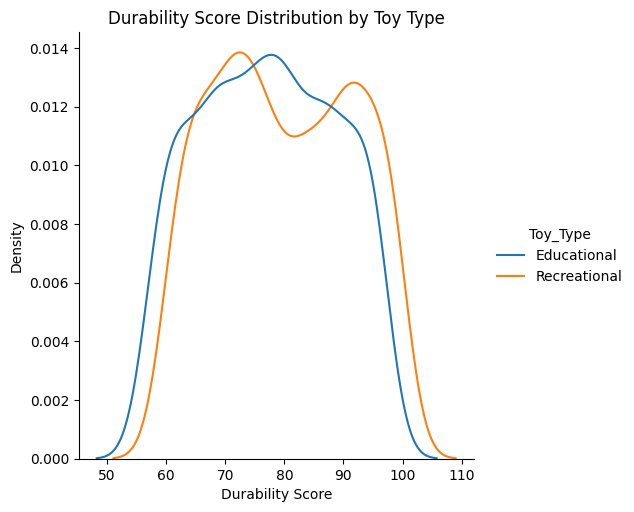

In [166]:
# Visualize the distribution of Durability_Score for each Toy_Type
sns.displot(data=toy_durability, x="Durability_Score", 
         hue="Toy_Type", kind="kde")
plt.title('Durability Score Distribution by Toy Type')
plt.xlabel('Durability Score')
plt.ylabel('Density')
plt.show()

In [ ]:
# Estimating required sample size for energy study

# In the energy sector, researchers are often tasked with evaluating the effectiveness of new technologies or initiatives to enhance energy efficiency or reduce consumption. A study is being designed to compare the impact of two energy-saving measures: "Smart Thermostats" and "LED Lighting". To ensure the study has sufficient power to detect a meaningful difference in energy savings between these two measures, you'll conduct a power analysis.

In [167]:
# Instantiate a TTestIndPower object
power_analysis = TTestIndPower()

# Conduct a power analysis to determine the required sample size
required_n = power_analysis.solve_power(
    effect_size=0.5, 
    alpha=0.05, 
    power=0.9, 
    ratio=1) # groups of equal size

print(required_n) # samples required in each group

85.03128688801546


In [ ]:
# Visualizing loan approval yield

# In the realm of financial services, understanding the factors that influence loan approval rates is crucial for both lenders and borrowers. A financial institution has conducted a study and collected data on loan applications, detailing the amount requested, the applicant's credit score, employment status, and the ultimate yield of the approval process. This rich dataset offers a window into the nuanced dynamics at play in loan decision-making. You have been asked to dive into the loan_approval_yield dataset to understand how loan amounts and credit scores influence approval yields.

In [168]:
loan_approval_yield = pd.read_csv('loan_approval_yield.csv')
loan_approval_yield

,Unnamed: 0,ApplicationID,LoanAmount,CreditScore,EmploymentStatus,ApprovalYield
0,0,1,High,Excellent,Unemployed,0.183435
1,1,2,Low,Poor,Self-Employed,0.445833
2,2,3,High,Good,Self-Employed,0.866176
3,3,4,High,Fair,Unemployed,0.969910
4,4,5,Medium,Fair,Employed,0.181825
...,...,...,...,...,...,...
2145,2145,2146,Medium,Excellent,Self-Employed,0.447303
2146,2146,2147,Medium,Good,Unemployed,0.184435
2147,2147,2148,Medium,Excellent,Self-Employed,0.759520
2148,2148,2149,Medium,Poor,Unemployed,0.021150


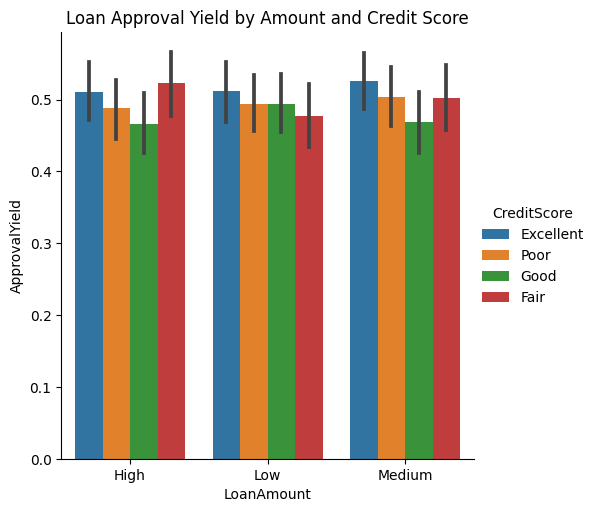

In [169]:
# Use Seaborn to create the bar graph
sns.catplot(x="LoanAmount", 
            y="ApprovalYield", 
            hue="CreditScore", 
            kind="bar", 
            data=loan_approval_yield)
plt.title("Loan Approval Yield by Amount and Credit Score")
plt.show()

In [173]:
# two ways ANOVA

model = ols('ApprovalYield ~ C(LoanAmount) + C(CreditScore) + C(LoanAmount):C(CreditScore)', data=loan_approval_yield).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(LoanAmount),0.008920,2.0,0.054086,0.947352
C(CreditScore),0.431582,3.0,1.744505,0.155820
C(LoanAmount):C(CreditScore),0.305326,6.0,0.617082,0.716828
Residual,176.310320,2138.0,NaN,NaN


In [ ]:
# Exploring customer satisfaction

# Merging datasets is a crucial skill in data analysis, especially when dealing with related data from different sources. You're working on a project for a financial institution to understand the relationship between loan approval rates and customer satisfaction. Two separate studies have been conducted: one focusing on loan approval yield based on various factors, and another on customer satisfaction under different conditions. Your task is to analyze how approval yield correlates with customer satisfaction, considering another variable such as interest rates.

In [174]:
customer_satisfaction = pd.read_csv('customer_satisfaction.csv')
customer_satisfaction

,Unnamed: 0,ApplicationID,ResponseTime,InterestRate,CustomerInteraction,SatisfactionQuality
0,0,1,Fast,Low,Poor,0.204979
1,1,2,Moderate,High,Good,0.462610
2,2,3,Slow,Medium,Average,0.874398
3,3,4,Moderate,High,Average,0.428884
4,4,5,Fast,High,Poor,0.126637
...,...,...,...,...,...,...
2145,2145,2146,Fast,Medium,Poor,0.157689
2146,2146,2147,Slow,High,Good,0.988838
2147,2147,2148,Fast,Low,Average,0.872413
2148,2148,2149,Fast,Low,Average,0.341710


In [175]:
# Merge the two datasets
merged_data = pd.merge(loan_approval_yield, 
                       customer_satisfaction, 
                       on='ApplicationID')

merged_data

,Unnamed: 0_x,ApplicationID,LoanAmount,CreditScore,EmploymentStatus,ApprovalYield,Unnamed: 0_y,ResponseTime,InterestRate,CustomerInteraction,SatisfactionQuality
0,0,1,High,Excellent,Unemployed,0.183435,0,Fast,Low,Poor,0.204979
1,1,2,Low,Poor,Self-Employed,0.445833,1,Moderate,High,Good,0.462610
2,2,3,High,Good,Self-Employed,0.866176,2,Slow,Medium,Average,0.874398
3,3,4,High,Fair,Unemployed,0.969910,3,Moderate,High,Average,0.428884
4,4,5,Medium,Fair,Employed,0.181825,4,Fast,High,Poor,0.126637
...,...,...,...,...,...,...,...,...,...,...,...
2145,2145,2146,Medium,Excellent,Self-Employed,0.447303,2145,Fast,Medium,Poor,0.157689
2146,2146,2147,Medium,Good,Unemployed,0.184435,2146,Slow,High,Good,0.988838
2147,2147,2148,Medium,Excellent,Self-Employed,0.759520,2147,Fast,Low,Average,0.872413
2148,2148,2149,Medium,Poor,Unemployed,0.021150,2148,Fast,Low,Average,0.341710


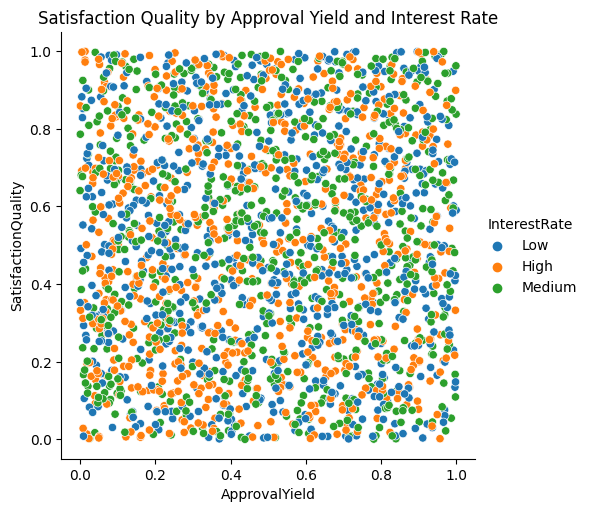

In [176]:
# Use Seaborn to create the scatter plot
sns.relplot(x="ApprovalYield", 
            y="SatisfactionQuality", 
            hue="InterestRate", 
            kind="scatter", 
            data=merged_data)
plt.title("Satisfaction Quality by Approval Yield and Interest Rate")
plt.show()

In [ ]:
# Check for heteroscedasticity in shelf life

# When examining food preservation methods, it's crucial to understand how the variance of one variable, such as shelf life, might change across the range of another variable like nutrient retention. Identifying such patterns, known as heteroscedasticity, can provide insights into the consistency of preservation effects. The food_preservation dataset encapsulates the outcomes of various preservation methods on different food types, specifically highlighting the balance between nutrient retention and resultant shelf life.

In [186]:
# Number of samples
n_samples = 215

# Create the 'PreservationMethod' column
preservation_method = ['Drying'] * 75 + ['Freezing'] * 74 + ['Canning'] * 66

# Create the 'FoodType' column
food_type = ['Fruit'] * 80 + ['Vegetable'] * 69 + ['Meat'] * 66

# Randomly shuffle 'PreservationMethod' and 'FoodType' to avoid any unintentional patterns
np.random.shuffle(preservation_method)
np.random.shuffle(food_type)

# Create the dataset
data = {
    'ProductID': list(range(1, n_samples + 1)),
    'PreservationMethod': preservation_method,
    'FoodType': food_type,
    'NutrientRetention': np.random.normal(loc=73.481, scale=14.838, size=n_samples),
    'ShelfLife': np.random.normal(loc=105.210, scale=54.661, size=n_samples)
}

food_preservation = pd.DataFrame(data)

food_preservation

,ProductID,PreservationMethod,FoodType,NutrientRetention,ShelfLife
0,1,Canning,Meat,64.037433,77.290391
1,2,Drying,Fruit,70.620080,182.387265
2,3,Drying,Vegetable,52.766883,175.328758
3,4,Canning,Vegetable,82.414094,74.947223
4,5,Drying,Vegetable,74.630825,37.849899
...,...,...,...,...,...
210,211,Drying,Vegetable,71.717246,173.659316
211,212,Drying,Fruit,102.073191,-9.591544
212,213,Canning,Fruit,68.188496,187.736030
213,214,Canning,Meat,50.676398,157.552952


<Axes: >

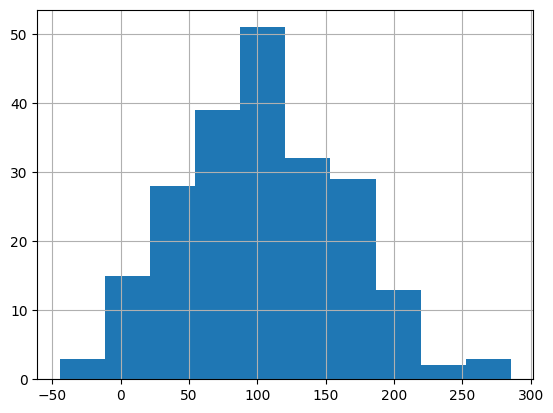

In [187]:
food_preservation.ShelfLife.hist()

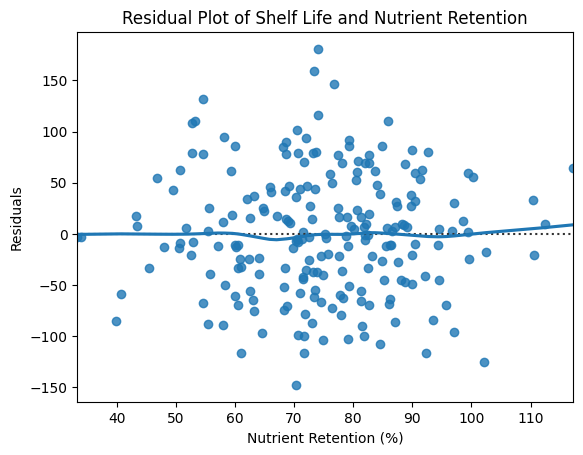

In [188]:
# Check for heteroscedasticity with a residual plot
sns.residplot(x='NutrientRetention', y='ShelfLife', 
         data=food_preservation, lowess=True)
plt.title('Residual Plot of Shelf Life and Nutrient Retention')
plt.xlabel('Nutrient Retention (%)')
plt.ylabel('Residuals')
plt.show()

C:\Users\Alienware\miniconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


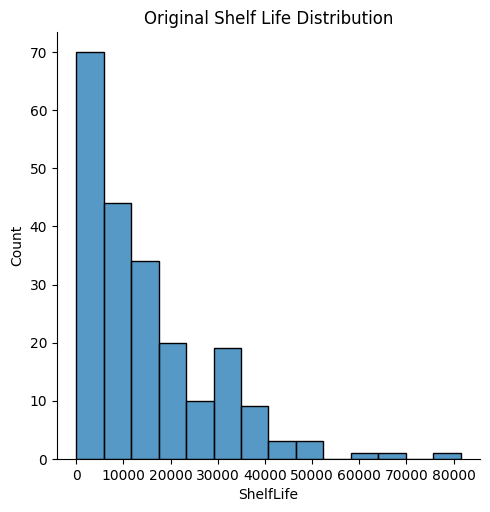

In [189]:
# Apply a square root transformation
# food_preservation['ShelfLife'] = food_preservation['ShelfLife'].apply(np.sqrt) # to make the distribution left skewed
# Apply an exponential transformation
food_preservation['ShelfLife'] = food_preservation['ShelfLife'].apply(lambda x: x**2) # to make the distribution rght skewed

sns.displot(food_preservation['ShelfLife'])
plt.title('Original Shelf Life Distribution')
plt.show()

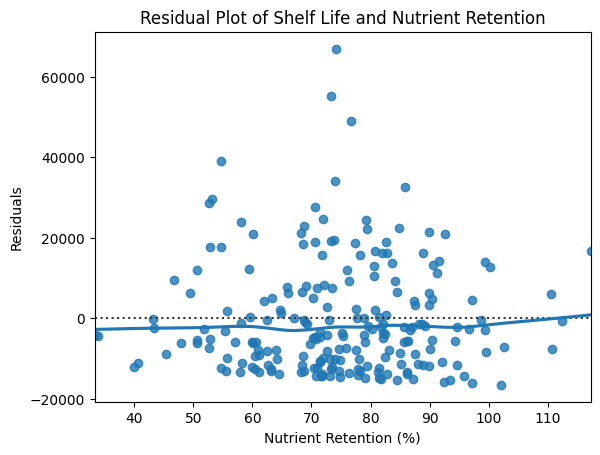

In [190]:
# Check for heteroscedasticity with a residual plot
sns.residplot(x='NutrientRetention', y='ShelfLife', 
         data=food_preservation, lowess=True)
plt.title('Residual Plot of Shelf Life and Nutrient Retention')
plt.xlabel('Nutrient Retention (%)')
plt.ylabel('Residuals')
plt.show()

In [ ]:
# Exploring and transforming shelf life data

# Understanding the distribution of different variables in our data is a key aspect of any data work including experimental analysis. The food_preservation dataset captures various food preservation methods and their impact on nutrient retention and shelf life. A crucial aspect of this data involves the shelf life of preserved foods, which can vary significantly across different preservation methods and food types.

In [191]:
# Create a Box-Cox transformation (to normalize ShelfLife again)

ShelfLifeTransformed, _ = boxcox(food_preservation['ShelfLife'])
food_preservation['ShelfLife_transf'] = ShelfLifeTransformed
food_preservation

,ProductID,PreservationMethod,FoodType,NutrientRetention,ShelfLife,ShelfLife_transf
0,1,Canning,Meat,64.037433,5973.804603,59.880465
1,2,Drying,Fruit,70.620080,33265.114445,113.032155
2,3,Drying,Vegetable,52.766883,30740.173450,109.807812
3,4,Canning,Vegetable,82.414094,5617.086206,58.515379
4,5,Drying,Vegetable,74.630825,1432.614843,34.815516
...,...,...,...,...,...,...
210,211,Drying,Vegetable,71.717246,30157.558080,109.039842
211,212,Drying,Fruit,102.073191,91.997722,11.293018
212,213,Canning,Fruit,68.188496,35244.816869,115.451852
213,214,Canning,Meat,50.676398,24822.932821,101.518478


C:\Users\Alienware\miniconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


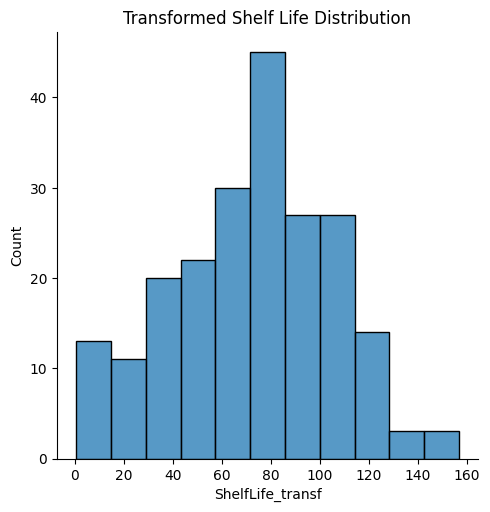

In [192]:
# Visualize the transformed ShelfLife distribution

sns.displot(food_preservation['ShelfLife_transf'])
plt.title('Transformed Shelf Life Distribution')
plt.show()

In [ ]:
# Visualizing and testing preservation methods

# As a food scientist, you're tasked with evaluating the effectiveness of different preservation methods on nutrient retention and how these methods impact shelf life. You have been provided with a dataset, food_preservation, that includes various types of food preserved by methods such as freezing and canning. Each entry in the dataset captures the nutrient retention and calculated shelf life for these foods, providing a unique opportunity to analyze the impacts of preservation techniques on food quality.

<Axes: >

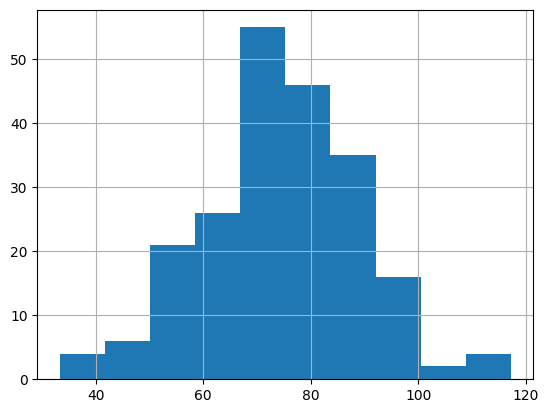

In [195]:
food_preservation['NutrientRetention'].hist()

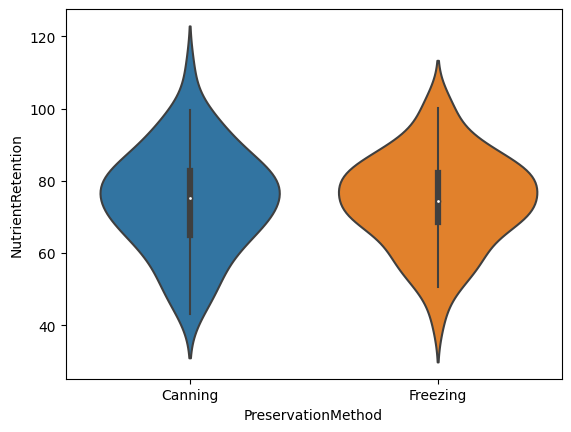

In [196]:
# Filter to Freezing and Canning data
condensed_food_data = food_preservation[food_preservation['PreservationMethod'].isin(['Freezing', 'Canning'])]

# Create a violin plot for nutrient retention by preservation method
sns.violinplot(data=condensed_food_data, 
               x="PreservationMethod", 
               y="NutrientRetention")
plt.show()

In [198]:
# Separate nutrient retention for Freezing and Canning methods
freezing = food_preservation[food_preservation['PreservationMethod'] == 'Freezing']['NutrientRetention']
canning = food_preservation[food_preservation['PreservationMethod'] == 'Canning']['NutrientRetention']

# Perform Mann Whitney U test
u_stat, p_val = mannwhitneyu(freezing, canning)

# Print the p-value
print("Mann Whitney U test p-value:", p_val)

Mann Whitney U test p-value: 0.9617118520745878


C:\Users\Alienware\miniconda3\envs\py310\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Alienware\miniconda3\envs\py310\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Alienware\miniconda3\envs\py310\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


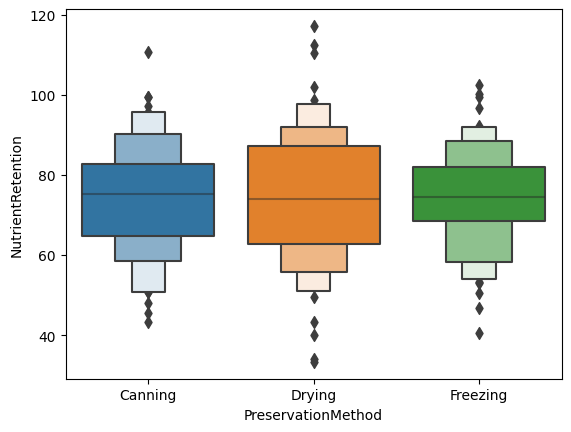

In [199]:
# Create a boxen plot for nutrient retention by preservation method
sns.boxenplot(data=food_preservation, 
              x="PreservationMethod", 
              y="NutrientRetention")
plt.show()

In [200]:
# Separate nutrient retention for each preservation method
freezing = food_preservation[food_preservation['PreservationMethod'] == 'Freezing']['NutrientRetention']
canning = food_preservation[food_preservation['PreservationMethod'] == 'Canning']['NutrientRetention']
drying = food_preservation[food_preservation['PreservationMethod'] == 'Drying']['NutrientRetention']

# Perform Kruskal-Wallis test
k_stat, k_pval = kruskal(freezing, canning, drying)
print("Kruskal-Wallis test p-value:", k_pval)

Kruskal-Wallis test p-value: 0.9287492372254256
